In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Reading data from csv file

dataset = pd.read_csv('../../DataSets/data_set_dra_updated.csv')

x = pd.DataFrame(dataset.iloc[:, 0:6].values)
y = dataset.iloc[:, 6].values

In [3]:
# Generating training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [4]:
# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 10, activation = 'relu', input_dim = 6))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))


In [5]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
13848/13848 [==============================] - 8s 572us/step - loss: 37.1432 - accuracy: 0.0000e+00 - val_loss: 33.9047 - val_accuracy: 0.0000e+00
Epoch 2/100
13848/13848 [==============================] - 8s 610us/step - loss: 33.3183 - accuracy: 0.0000e+00 - val_loss: 33.6948 - val_accuracy: 0.0000e+00
Epoch 3/100
13848/13848 [==============================] - 12s 882us/step - loss: 32.9822 - accuracy: 0.0000e+00 - val_loss: 33.3097 - val_accuracy: 0.0000e+00
Epoch 4/100
13848/13848 [==============================] - 16s 1ms/step - loss: 32.8143 - accuracy: 0.0000e+00 - val_loss: 33.1799 - val_accuracy: 0.0000e+00
Epoch 5/100
13848/13848 [==============================] - 12s 853us/step - loss: 32.3389 - accuracy: 0.0000e+00 - val_loss: 32.1912 - val_accuracy: 0.0000e+00
Epoch 6/100
13848/13848 [==============================] - 11s 772us/step - loss: 31.1351 - accuracy: 0.0000e+00 - val_loss: 31.2154 - val_accuracy: 0.0000e+00
Epoch 7/100
13848/13848 [===================

In [6]:
# Prediction

y_pred = classifier.predict(x_test)

In [7]:
# Prediction Metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

MSE = mse(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAX_ERROR = max_error(y_test, y_pred);
MEAN_ABSOLUTE_ERROR = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error", MSE)
print("R-Squared: ", R2)
print("Max Error", MAX_ERROR);
print("Mean Absolute Error", MEAN_ABSOLUTE_ERROR);

Mean Squared Error 14.043377638771627
R-Squared:  0.5807220343757393
Max Error 40.766306555
Mean Absolute Error 2.54403984010763


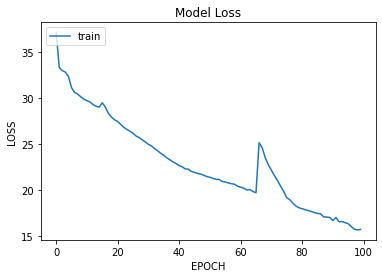

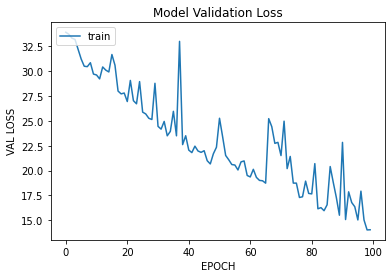

In [8]:
# Training Analysis

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

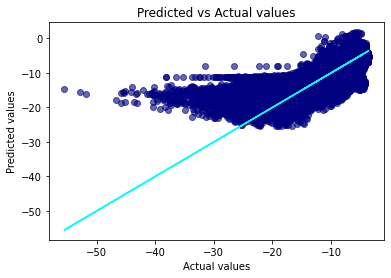

In [9]:
# Accuracy Plot

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)

In [ ]:
# Data Samples

d1 = [14.10, 14.55, 2.25, 2.6, 2.42] #HFSS S11 = -0.37
d2 = [13.04, 13.30, 2.3, 2.7, 1.84] # HFSS S11 = -0.43
d3 = [13.19, 13.74, 2.7, 2.45, 1.95] # HFSS S11 = -0.44
d4 = [14.42, 13.12, 2.4, 2.8, 2.41] # HFSS S11 = -0.51
d5 = [13.86, 14.57, 2.8, 2.1, 2.56] #HFSS S11 = -0.77

# Predictions
preds = classifier.predict([d1,d2,d3,d4,d5])

print("Predictions", preds);

In [ ]:
# Generating random data sets

import numpy
import pandas

SAMPLE_SIZE = 10

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

rand_rad = randomSample(12, 14, SAMPLE_SIZE)
rand_height = randomSample(13, 14, SAMPLE_SIZE)
rand_freq = randomSample(2, 6, SAMPLE_SIZE)
rand_w1 = randomSample(2.5, 3.5, SAMPLE_SIZE)
rand_w2 = randomSample(2.5, 3.5, SAMPLE_SIZE)

rand_x = []
for i in range(0,SAMPLE_SIZE):
    rand_x.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i],])

y_pred_rand = classifier.predict(rand_x)

output = []
for i in range(0, SAMPLE_SIZE):
    output.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i], y_pred_rand[i]])
    
# Creating Dataframe
output_df = pandas.DataFrame(output, columns= ["Height", "Radius", "W1", "W2", "Frequency", "S11"])
print("Predicted Values for random samples\n")
print(output_df)